**Importing the Required Modules**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

from google.colab import drive
drive.mount('/drive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


**Utility Functions**

In [54]:
def nans_statistic(df:pd.DataFrame) -> pd.DataFrame:
    nan_df = df.isna().sum().to_frame().rename(columns={0: "count"})
    nan_df['%'] = (df.isna().sum() / df.shape[0] * 100).round(2)
    nan_df.sort_values("count", ascending=False).transpose().style.background_gradient(cmap='Reds', axis=1)
    return nan_df

## **1. EDA**

In [55]:
TRAIN_PATH = "/drive/My Drive/rul/ALLtrainMescla5D.csv"
TEST_PATH = "/drive/My Drive/rul/ALLtestMescla5D.csv"

train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

## **1.1 Dataset Description**

Исходный набор данных:

In [56]:
train_df.dtypes

machineID           int64
datetime           object
time_in_cycles      int64
voltmean_24h      float64
rotatemean_24h    float64
                   ...   
RULWeek           float64
failure            object
failed              int64
RUL               float64
RUL_I             float64
Length: 36, dtype: object

In [57]:
nans = nans_statistic(train_df)
nans

,count,%
machineID,0,0.0
datetime,0,0.0
time_in_cycles,0,0.0
voltmean_24h,0,0.0
rotatemean_24h,0,0.0
...,...,...
RULWeek,0,0.0
failure,0,0.0
failed,0,0.0
RUL,0,0.0


Пропусков в данных нет

In [58]:
train_df.head()
train_df.sample(20)

,machineID,datetime,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,...,comp3,comp4,model,age,DI,RULWeek,failure,failed,RUL,RUL_I
20131,96,2015-05-23,139,190.7270,448.7722,99.9216,39.8179,15.0543,53.0831,8.2423,...,0.0,0.0,model2,10,2.0574,3.0,none,0,20.0,55.0
583,2,2015-12-14,345,186.2474,463.0094,123.6424,40.9943,14.2672,32.5007,8.7572,...,0.0,0.0,model4,7,0.0509,35.0,none,0,240.0,15.0
19223,91,2015-07-29,206,164.9787,461.4109,97.8794,39.4851,15.8530,59.6547,7.9680,...,0.0,0.0,model4,17,1.5469,4.0,none,0,28.0,47.0
20737,99,2015-11-29,329,173.6668,437.3034,105.2570,39.6474,15.8177,54.5293,16.7179,...,30.0,0.0,model1,14,0.5657,5.0,comp3,1,30.0,0.0
18947,90,2015-07-26,203,173.5829,442.7111,97.5471,40.1535,15.6559,51.0482,10.0587,...,0.0,0.0,model2,2,0.3679,8.0,none,0,52.0,23.0
17626,85,2015-06-17,164,169.4741,435.0610,96.6330,40.1085,15.0200,39.1127,7.2820,...,0.0,0.0,model1,16,1.5587,3.0,none,0,18.0,12.0
1453,7,2015-11-05,306,169.1714,474.8214,98.4753,40.0779,18.5711,43.3488,7.4886,...,0.0,15.0,model3,20,1.6325,3.0,none,0,15.0,45.0
15643,75,2015-03-04,59,172.1158,445.9508,98.6910,40.3730,11.4855,44.9848,8.6794,...,0.0,0.0,model3,19,1.2062,4.0,none,0,26.0,34.0
18227,87,2015-11-19,319,167.9585,456.1915,101.9870,41.2176,18.1152,53.4621,11.4340,...,0.0,0.0,model2,12,1.5080,4.0,none,0,26.0,34.0
12779,61,2015-05-09,125,172.2223,447.0893,102.0240,39.1900,15.2821,46.9610,10.5407,...,0.0,0.0,model4,2,1.1314,11.0,none,0,71.0,94.0


Данные в наборе данных представлены

1. Осредненными для одного и пяти дней измерениями величин давления, вращения, вибрации, напряжения и их вариацией

In [59]:
phisycal_meas = ['voltmean_24h', 'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h','pressuresd_24h',
                  'vibrationsd_24h', 'voltmean_5d','rotatemean_5d','pressuremean_5d', 'vibrationmean_5d', 'voltsd_5d', 'rotatesd_5d', 'pressuresd_5d','vibrationsd_5d']

2. Данными связанных с датой и временем: время измерения, относительное время измерения - порядковый номер цикла, временем обслуживания того или иного узла обородования, оставшееся время полезной работы до выхода из строя в неделях и циклах работы

In [60]:
time_features = ["datetime", "time_in_cycles", "comp1", "comp2", "comp3", "comp4", "RULWeek", ]

3. номинальными значениями отказами не затрагивающих работоспособонсть оборудования в целом, моделью оборудования, признаком отказа оборудования, идентификатором оборудования, признаком отказа того или иного узла оборудования

In [61]:
nom_features = ["machineID", "failure", "failed", "model", "error1", "error2",
           "error3", "error4", "error5"]

  4. Порядковыми значениями: возрастом той или иной модели оборудование

In [62]:
ages =["age"]

Целевая переменная в задачах регрессии будет RUL_I полезное время до выхода оборудования в циклах

## **1.2 Feature Space EDA**

### **1.2.1 Frequency of Operation Errors**

Распределение типов ошибок оборудования

Text(0.5, 1.0, 'Total Number of Errors')

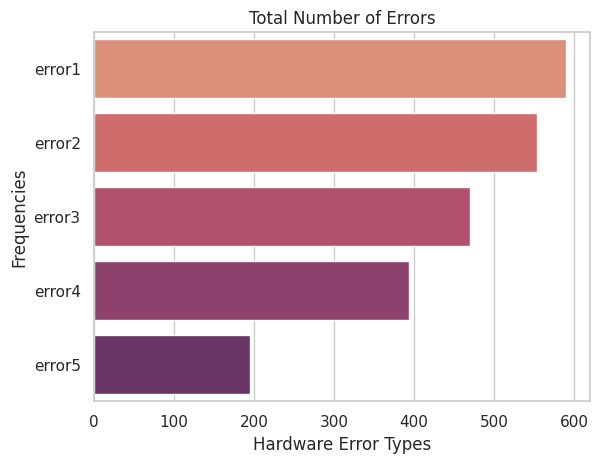

In [63]:
errors_df = train_df[['error1','error2','error3','error4','error5']].astype(int).sum()
errors_df = pd.DataFrame({'error_type': errors_df.index, 'freq': errors_df.values})
sns.barplot(data=errors_df, y='error_type', x='freq', orient='h', palette="flare")
plt.xlabel('Hardware Error Types')
plt.ylabel('Frequencies')
plt.title('Total Number of Errors')

Так как ошибки не равномерно распределены по их типам можно предположить полезность включение информации о типе ошибке как признаке для предсказания RUL_I. Также посмотрим на частотную связь между ошибками в работе оборудования и самим фактом выхода из строя - failed=0

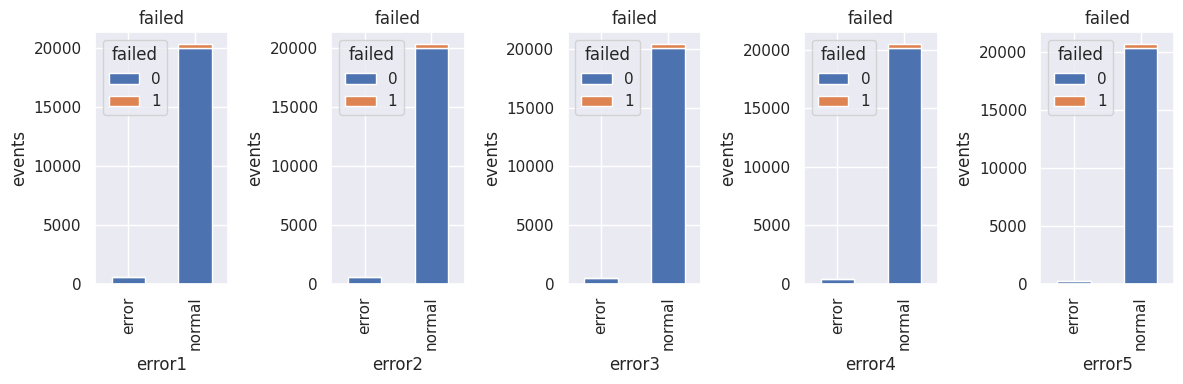

In [64]:
error_columns=['error1', 'error2', 'error3', 'error4', 'error5']

casting = {'error1': int, 'error2': int, 'error3': int, 'error4': int, 'error5': int}
prepared_df = train_df.astype(casting)
prepared_df[error_columns] = prepared_df[error_columns].applymap(lambda x: 'error' if x > 0 else 'normal')


cont_tables = []
for column in error_columns:
    cont_table = pd.crosstab(prepared_df[column], prepared_df['failed'])
    cont_tables.append(cont_table)

sns.set(style='darkgrid')
fig, axes = plt.subplots(1, len(cont_tables), figsize=(12, 4))
for i, cont_table in enumerate(cont_tables):
    ax = axes[i]
    cont_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(cont_table.columns.name)
    ax.set_xlabel(cont_table.index.name)
    ax.set_ylabel('events')

plt.tight_layout()
plt.show()

Как будто бы парадокс: выход оборудования никак не связан с выходом из строя его отдельных узлов так как выход из строя связан происходит в нормальном состоянии оборудования. Для определения важности признаков содержащий информацию выходе из строя отдельных узлов в следующем разделе расмотрим временную связь между ошибками отдельных узлов и самим выходом из строя

### **1.2.2 Machines**

Теперь посмотрим качественный состав нашего оборудования

In [65]:
models_counts = train_df["model"].value_counts().reset_index()
models_counts.columns = ["model", "counts"]
models_features = models_counts["model"].values.tolist()

models_counts.head()

,model,counts
0,model4,7036
1,model3,6785
2,model1,3577
3,model2,3469


Text(0.5, 1.0, 'Machines')

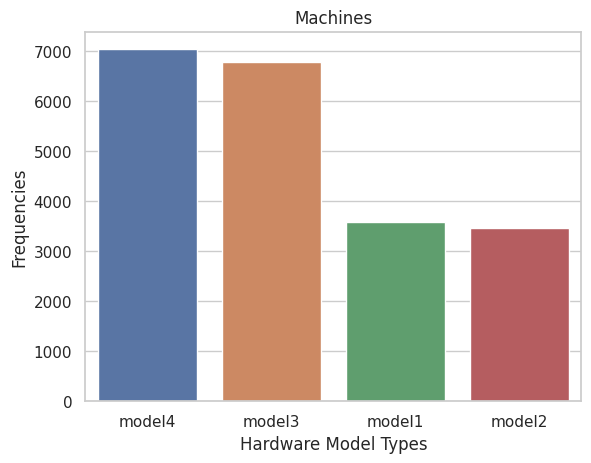

In [66]:
sns.set_style("whitegrid")
sns.barplot(data=models_counts, y="counts", x="model", orient='v')
plt.xlabel("Hardware Model Types")
plt.ylabel("Frequencies")
plt.title("Machines")

Рассмотрим связь возраста и модели оборудования или другими словами модели оборудования просто связаны с годом выпуска оборудовани. Возможно будет отбросить один из признаков age или модель

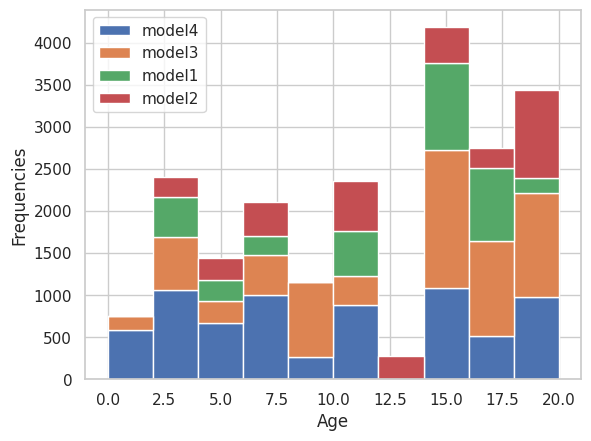

In [67]:
_, bins, _ = plt.hist([train_df.loc[train_df["model"] == model, "age"] for model in models_features],
                       10, stacked=True, label=models_features)
plt.xlabel("Age")
plt.ylabel("Frequencies")
plt.legend()

И так мы видим нет зависимости типа модели от года выпуска так что пока в качестве признаков стоит оставить обе группы признаков

### **1.2.3 Maintenance**

Теперь определимся насколько важна информация о времени обслуживания оборудования, когда тот или иной узел находится впростое

Text(0, 0.5, 'Frequency')

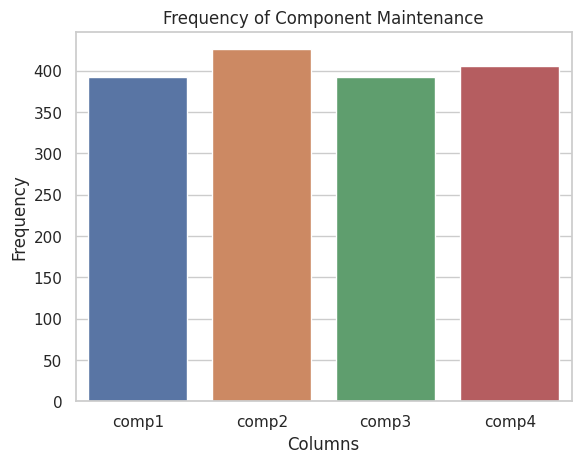

In [68]:
comp_columns=["comp1", "comp2", "comp3", "comp4"]
non_zero_freq = (train_df[comp_columns] != 0).sum()
sns.barplot(x=non_zero_freq.index, y=non_zero_freq.values)
plt.title("Frequency of Component Maintenance")
plt.xlabel("Columns")
plt.ylabel("Frequency")

Видно что использовать инфорамацию о нахождении в ремонте того или иного компонента тоже имеет смысл. Но сами значения в колонках стоит заменить на 0 и 1 для упрощения нормализации признаков. Смысл таких признаков состоит в индикации накопленных неустраненных неисправностей

### **1.2.4 Physical Measurements**

Посмотрим как у нас представлены распределения физических величин и их вариаций

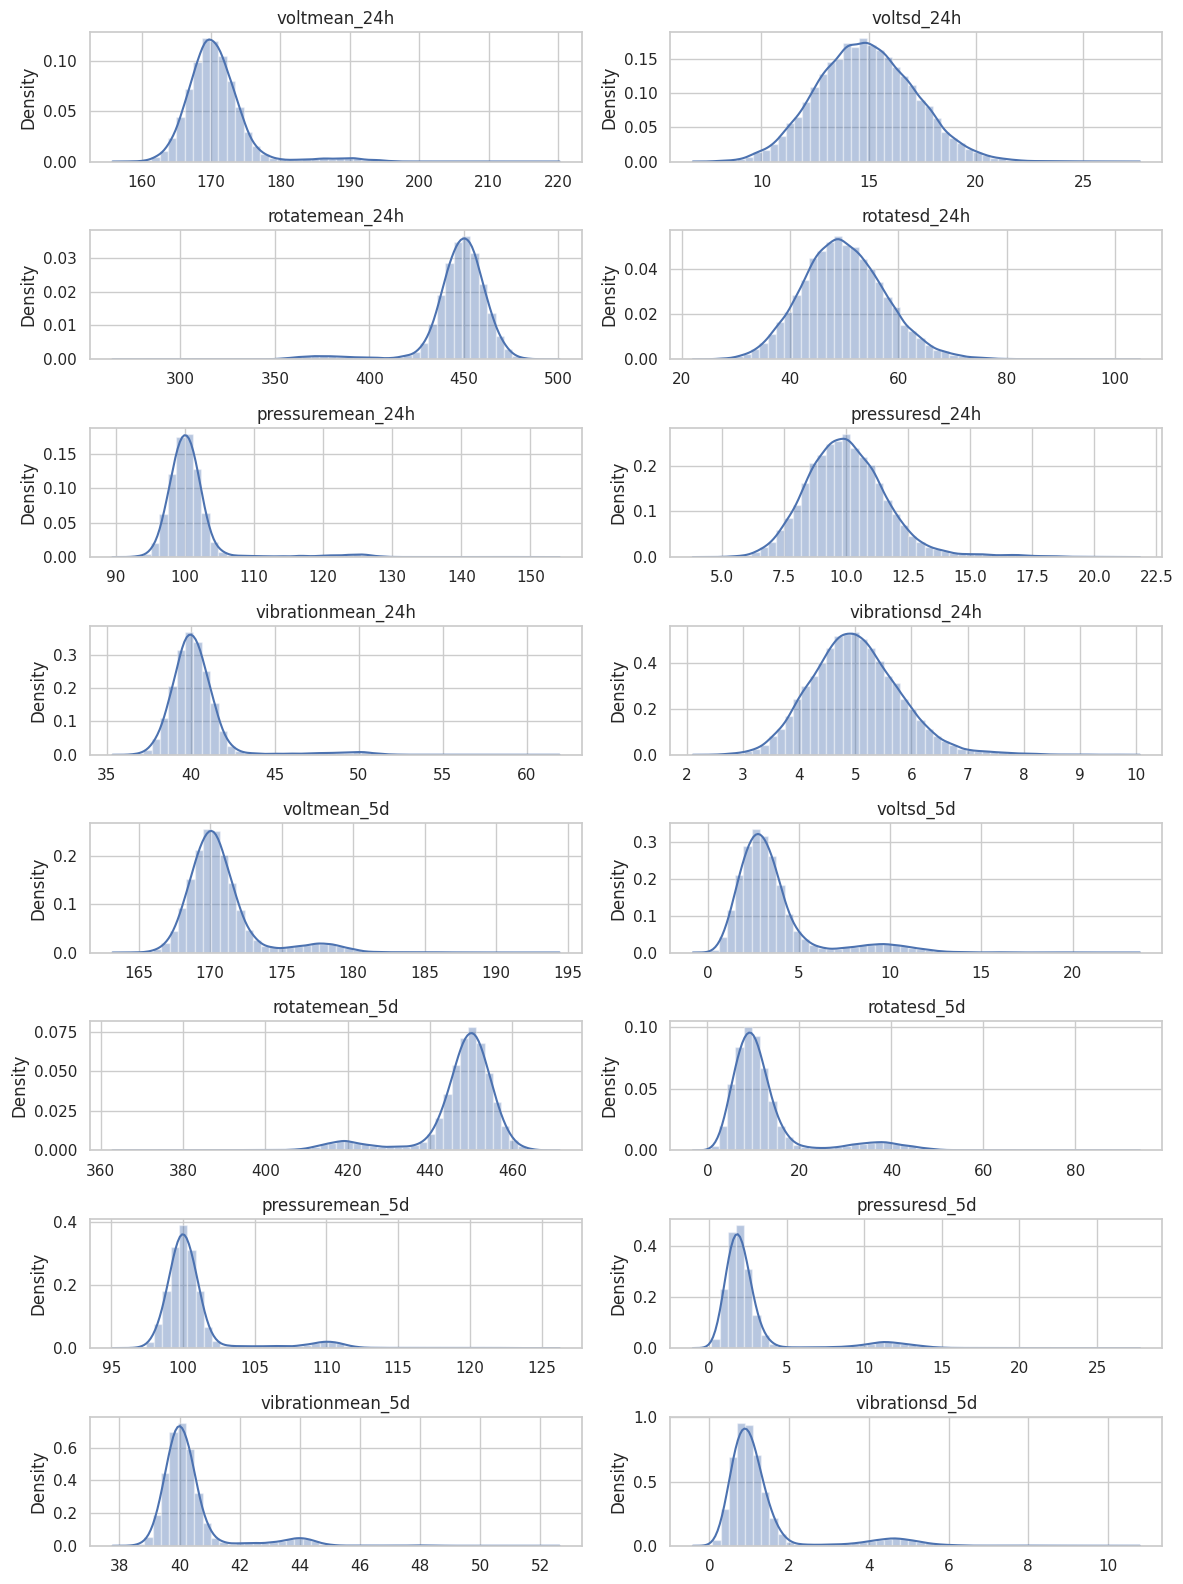

In [69]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(12, 16))

features = ["voltmean_24h","rotatemean_24h", "pressuremean_24h",
            "vibrationmean_24h",
            "voltmean_5d","rotatemean_5d", "pressuremean_5d", "vibrationmean_5d"]

features_sd = ["voltsd_24h","rotatesd_24h", "pressuresd_24h", "vibrationsd_24h",
            "voltsd_5d", "rotatesd_5d", "pressuresd_5d", "vibrationsd_5d"]

for i, (feature, feature_sd) in enumerate(zip(features, features_sd)):
    sns.distplot(train_df[feature].values,  kde=True, ax=axs[i, 0])
    sns.distplot(train_df[feature_sd].values, kde=True, ax=axs[i, 1])
    axs[i,0].set_title(feature)
    axs[i,1].set_title(feature_sd)

plt.tight_layout()

Как видно распределения представлены двумодальными распределениями, где вторая мода может указывать на аномльные измерения являющимися признаками скорого выхода из строя

## **1.3 Time Space EDA**

### **1.3.1  Phisical Measurements Trendability**

Начнем наш анализ с поиска фичей которые резко меняются со временем сделаем это для каждой машинны отдельно

In [70]:
def trendability(col):
  trend_vals = []
  for idx in train_df['machineID'].unique():
      dff = train_df[train_df['machineID'] == idx]
      trend_vals.append(dff[['time_in_cycles', col]].corr().iloc[0][1])
  return np.abs(np.mean(trend_vals))

trend_df_list = []
for col in phisycal_meas:
    trend_df_list.append({'feature': col, 'trendability_val': trendability(col)})

trend_df = pd.DataFrame(trend_df_list, columns = ['feature', 'trendability_val'])
trend_df = trend_df.sort_values(by = 'trendability_val', ascending = False)
trend_df.head()

,feature,trendability_val
15,vibrationsd_5d,0.0439
11,vibrationmean_5d,0.0361
3,vibrationmean_24h,0.0311
1,rotatemean_24h,0.0284
12,voltsd_5d,0.0260


из таблицы видно не смотря на бимодальное распределение данных большинство данных сосредоточено "вокруг" среднего значения

### **1.3.2 Operation Errors as Health Indicator**

Проверим предположение полезности включения информации о произошедших отказах как индикаторе последующего выхода из строя оборудования. Для этого на временных диаграмах посмотрим как сменяют друг друга состояния "error" и "faulure" для одной машины

[Text(0, 0, '2015-01-10'),
 Text(1, 0, '2015-01-22'),
 Text(2, 0, '2015-01-25'),
 Text(3, 0, '2015-01-27'),
 Text(4, 0, '2015-03-03'),
 Text(5, 0, '2015-03-05'),
 Text(6, 0, '2015-03-20'),
 Text(7, 0, '2015-03-26'),
 Text(8, 0, '2015-03-31'),
 Text(9, 0, '2015-04-19'),
 Text(10, 0, '2015-04-29'),
 Text(11, 0, '2015-05-04'),
 Text(12, 0, '2015-05-12'),
 Text(13, 0, '2015-05-21'),
 Text(14, 0, '2015-05-24'),
 Text(15, 0, '2015-05-25'),
 Text(16, 0, '2015-06-09'),
 Text(17, 0, '2015-06-18'),
 Text(18, 0, '2015-09-13'),
 Text(19, 0, '2015-09-15'),
 Text(20, 0, '2015-10-01'),
 Text(21, 0, '2015-10-15'),
 Text(22, 0, '2015-10-16'),
 Text(23, 0, '2015-11-10'),
 Text(24, 0, '2015-12-15'),
 Text(25, 0, '2015-03-06'),
 Text(26, 0, '2015-04-20'),
 Text(27, 0, '2015-06-19'),
 Text(28, 0, '2015-10-17'),
 Text(29, 0, '2015-12-16')]

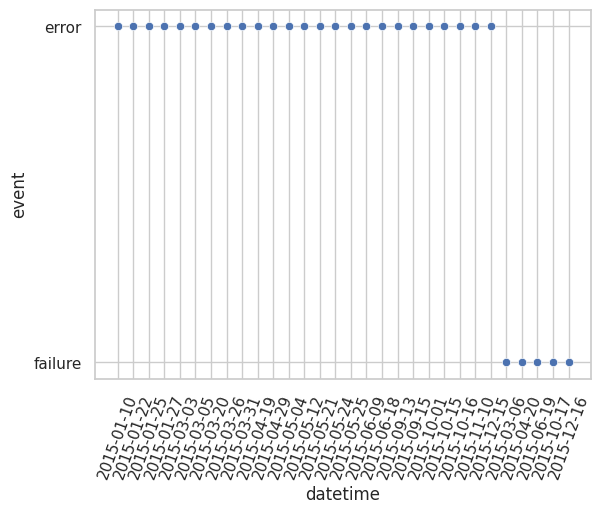

In [71]:
models = ['model1', 'model2', 'model3', 'model4']
casting = {'error1': int, 'error2': int, 'error3': int, 'error4': int, 'error5': int, 'failed': int}
prepared_df = train_df.astype(casting)
machine_df = prepared_df[prepared_df['machineID']==1]

machine_df['event'] = machine_df[error_columns].sum(axis=1)
machine_df['event'] = machine_df[['event']].applymap(lambda x: 'error' if x > 0 else 'normal')
error_df = machine_df[machine_df['event'] =='error'][['datetime', 'event']]

machine_df['fail'] = machine_df[['failed']].applymap(lambda x: 'failure' if x > 0 else 'normal')
failed_df = machine_df[machine_df['fail'] == 'failure'][['datetime', 'fail']]
failed_df.rename(columns = {'fail':'event',}, inplace = True)

event_df = pd.concat([error_df, failed_df])
markers = {"failure": "s", "error": "X"}
p=sns.scatterplot(data=event_df, x="datetime", y="event", markers=markers)
p.set_xticklabels(p.get_xticklabels(), rotation=70)

Как видно отказ того или иного узла являются хорошим индикатором выхода из строя оборудования

### **1.3.3 Physical Measurements Time Profile**

Рассмотрим характер изменения измерения физических величин до наступления отказа на все также примере первой машины

[Text(16679.0, 0, '2015-09-01'),
 Text(16693.0, 0, '2015-09-15'),
 Text(16709.0, 0, '2015-10-01'),
 Text(16723.0, 0, '2015-10-15'),
 Text(16740.0, 0, '2015-11-01'),
 Text(16754.0, 0, '2015-11-15'),
 Text(16770.0, 0, '2015-12-01'),
 Text(16784.0, 0, '2015-12-15')]

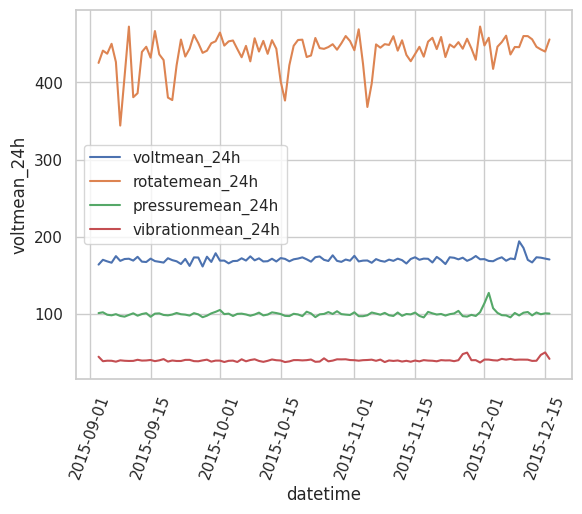

In [72]:
from datetime import datetime, timedelta
horizont_view = 120
machine_df['datetime'] = pd.to_datetime(machine_df['datetime'])
window_time = machine_df['datetime'].max() - pd.DateOffset(days=horizont_view)
window_df = machine_df[machine_df['datetime']> window_time]

selected_columns = window_df.filter(like='|'.join(['mean_24h']), axis=1)
selected_columns['datetime'] = window_df['datetime']

for column in selected_columns.columns.tolist()[:-1]:
    p=sns.lineplot(x=selected_columns['datetime'], y=selected_columns[column], label=column)
p.set_xticklabels(p.get_xticklabels(), rotation=70)

Как положение пиков на кривой так и сама форма кривой могут "подсказать" алгоритму время наступления отказа. Поэтому стоит закодировать форму кривой в новые признаки, что и сделаем в следующем разделе

## **2 Time Series Features Extraction**

## **2.1 Installing the Required Modules**

In [73]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **2.2 Feature Engineering**

В качестве новых фичей выбраны положение максимума, положение величины относительно среднего, самоподобие последовательности. Для извлечения новых признаков сначала формироваются последовательностей для каждой машины отдельно до наступления отказа затем по ними проходим скользящим окном. Выделенеие высокочастотных и низкочастотных составляющих из последовательностей не производим из за относительно короткого времени работы до отказа с медианным значением в районе 50 циклов как будет видно в следующем разделе

In [74]:
from tsfresh.feature_extraction.feature_calculators import (approximate_entropy,
    benford_correlation,  cid_ce,  count_above,
     count_above_mean,  count_below_mean,
     count_below,  count_above,  lempel_ziv_complexity)

def split_by_fails(df):
  dfs = []
  fails_ids = df.loc[df['failed'] == 1].index
  p_idx = 0
  for idx in fails_ids:
     dfs.append(df.loc[p_idx:idx])
     p_idx = idx + 1
  return dfs

def enhanced_features_dataset(df, window_size=5):

  fail_dfs = split_by_fails(df)

  num_insertions = window_size - 1

  rotate_max = []
  rotate_below = []
  rotate_above = []
  rotate_entropy = []
  rotate_benford = []
  rotate_cidce = []
  rotate_lzc = []

  volts_max = []
  volts_below = []
  volts_above = []
  volts_entropy = []
  volts_benford = []
  volts_cidce = []
  volts_lzc = []

  press_max = []
  press_below = []
  press_above = []
  press_entropy = []
  press_benford = []
  press_cidce = []
  press_lzc = []


  vibra_max = []
  vibra_below = []
  vibra_above = []
  vibra_entropy = []
  vibra_benford = []
  vibra_cidce = []
  vibra_lzc = []

  for fail_df in fail_dfs:

     fail_df = fail_df.reset_index(drop=True)
     first_row = fail_df.iloc[[0]]

     # Insert the first row multiple times at the beginning of the data frame
     inserted_rows = pd.concat([first_row] * num_insertions, ignore_index=True)
     padded_df = pd.concat([inserted_rows, fail_df])

     for i in range(len(padded_df) - window_size + 1):
      #Get the sub DataFrame within the rolling window
      window_data = padded_df.iloc[i:i + window_size]

      rotate_max.append(window_data["rotatemean_24h"].idxmax())
      rotate_below.append(count_below_mean(window_data["rotatemean_24h"]))
      rotate_above.append(count_above_mean(window_data["rotatemean_24h"]))
      rotate_benford.append(benford_correlation(window_data["rotatemean_24h"]))
      rotate_cidce.append(cid_ce(window_data["rotatemean_24h"], normalize="True"))
      rotate_lzc.append(lempel_ziv_complexity(window_data["rotatemean_24h"], 2))
      rotate_entropy.append(approximate_entropy(window_data["rotatemean_24h"], 2, 3))

      volts_max.append(window_data["voltmean_24h"].idxmax())
      volts_below.append(count_below(window_data["voltmean_24h"], 180))
      volts_above.append(count_above(window_data["voltmean_24h"], 180))
      volts_benford.append(benford_correlation(window_data["voltmean_24h"]))
      volts_cidce.append(cid_ce(window_data["voltmean_24h"], normalize="True"))
      volts_lzc.append(lempel_ziv_complexity(window_data["voltmean_24h"], 2))
      volts_entropy.append(approximate_entropy(window_data["voltmean_24h"], 2, 3))

      press_max.append(window_data["pressuremean_24h"].idxmax())
      press_below.append(count_below_mean(window_data["pressuremean_24h"]))
      press_above.append(count_above_mean(window_data["pressuremean_24h"]))
      press_benford.append(benford_correlation(window_data["pressuremean_24h"]))
      press_cidce.append(cid_ce(window_data["pressuremean_24h"], normalize="True"))
      press_lzc.append(lempel_ziv_complexity(window_data["pressuremean_24h"], 2))
      press_entropy.append(approximate_entropy(window_data["pressuremean_24h"], 2, 3))

      vibra_max.append(window_data["vibrationmean_24h"].idxmax())
      vibra_below.append(count_below_mean(window_data["vibrationmean_24h"]))
      vibra_above.append(count_above_mean(window_data["vibrationmean_24h"]))
      vibra_benford.append(benford_correlation(window_data["vibrationmean_24h"]))
      vibra_cidce.append(cid_ce(window_data["vibrationmean_24h"], normalize="True"))
      vibra_lzc.append(lempel_ziv_complexity(window_data["vibrationmean_24h"], 2))
      vibra_entropy.append(approximate_entropy(window_data["vibrationmean_24h"], 2, 3))

  feature_dict = {
      "rotate_max": rotate_max,
      "rotate_below": rotate_below,
      "rotate_above": rotate_above,
      "rotate_entropy": rotate_entropy,
      "rotate_benford": rotate_benford,
      "rotate_cidce": rotate_cidce,
      "rotate_lzc": rotate_lzc,

      "volts_max": volts_max,
      "volts_below": volts_below,
      "volts_above": volts_above,
      "volts_entropy": volts_entropy,
      "volts_benford": volts_benford,
      "volts_cidce": volts_cidce,
      "volts_lzc": volts_lzc,

      "press_max": press_max,
      "press_below": press_below,
      "press_above": press_above,
      "press_entropy": press_entropy,
      "press_benford": press_benford,
      "press_cidce": press_cidce,
      "press_lzc": press_lzc,

      "vibra_max": vibra_max,
      "vibra_below": vibra_below,
      "vibra_above": vibra_above,
      "vibra_entropy": vibra_entropy,
      "vibra_benford": vibra_benford,
      "vibra_cidce": vibra_cidce,
      "vibra_lzc": vibra_lzc}

  feature_data = pd.DataFrame(feature_dict)
  out_df = pd.concat([feature_data, df], axis=1)
  return out_df

def change_column_order(df):
  order = ["machineID" , "datetime", "time_in_cycles", "voltmean_24h","rotatemean_24h",
           "pressuremean_24h", "vibrationmean_24h", "voltsd_24h", "rotatesd_24h",
           "pressuresd_24h", "vibrationsd_24h", "voltmean_5d", "rotatemean_5d",
           "pressuremean_5d", "vibrationmean_5d", "voltsd_5d", "rotatesd_5d",
           "pressuresd_5d","vibrationsd_5d", "volts_entropy", "volts_benford",
           "volts_cidce", "volts_lzc", "press_max", "press_below", "press_above",
           "press_entropy", "press_benford", "press_cidce", "press_lzc",
           "vibra_max", "vibra_below", "vibra_above", "vibra_entropy",
           "vibra_benford", "vibra_cidce", "vibra_lzc", "rotate_max", "rotate_below",
           "rotate_above", "rotate_entropy", "rotate_benford", "rotate_cidce",
           "rotate_lzc","volts_max", "volts_below", "volts_above",
            "error1", "error2",
           "error3", "error4", "error5", "comp1", "comp2",
           "comp3", "comp4", "model", "age", "DI", "RULWeek", "failure",
           "failed", "RUL", "RUL_I"]
  return df[order]



## **2.3 Creating Feature Enhanced Datasets**

In [75]:
#размер скользящего окна
window_size = 5

train_df["datetime"] = pd.to_datetime(train_df["datetime"])
test_df["datetime"] = pd.to_datetime(train_df["datetime"])

ftrain_df = enhanced_features_dataset(train_df, window_size)
ftest_df = enhanced_features_dataset(test_df, window_size)

#Ограничеваем значения целевой переменной RUL_I как описано
#https://ieeexplore.ieee.org/abstract/document/7998311/

ftrain_df.loc[train_df["RUL_I"] > 135, "RUL_I"] = 135
ftest_df.loc[test_df["RUL_I"] > 135, "RUL_I"] = 135

ftrain_df["datetime"] = pd.to_datetime(train_df["datetime"])
ftest_df["datetime"] = pd.to_datetime(train_df["datetime"])

ftrain_df["time_in_cycles"] = ftrain_df["time_in_cycles"].astype(float)
ftest_df["time_in_cycles"] = ftest_df["time_in_cycles"].astype(float)

column_cast = {"error1": int, "error2": int, "error3": int, "error4": int,
               "error5": int, "comp1": int, "comp2": int, "comp3": int, "comp4": int}
ftrain_df = ftrain_df.astype(column_cast)
ftest_df = ftest_df.astype(column_cast)


comp_columns=["comp1", "comp2", "comp3", "comp4"]
casting = {"comp1": int, "comp2": int, "comp3": int, "comp4": int}
ftrain_df = ftrain_df.astype(casting)
ftrain_df[comp_columns] = ftrain_df[comp_columns].applymap(lambda x: 1 if x > 0 else 0)

ftest_df = ftest_df.astype(casting)
ftest_df[comp_columns] = ftest_df[comp_columns].applymap(lambda x: 1 if x > 0 else 0)


mapping = {"model1": 1, "model2": 2, "model3": 3, "model4": 4}
ftrain_df = ftrain_df.replace({"model": mapping})
ftest_df = ftest_df.replace({"model": mapping})

# **3 Train and Test Dataset Preparation**

## **3.1 Train and Test Dataset Data Drift**

### **3.1.1 KDE Target Values**

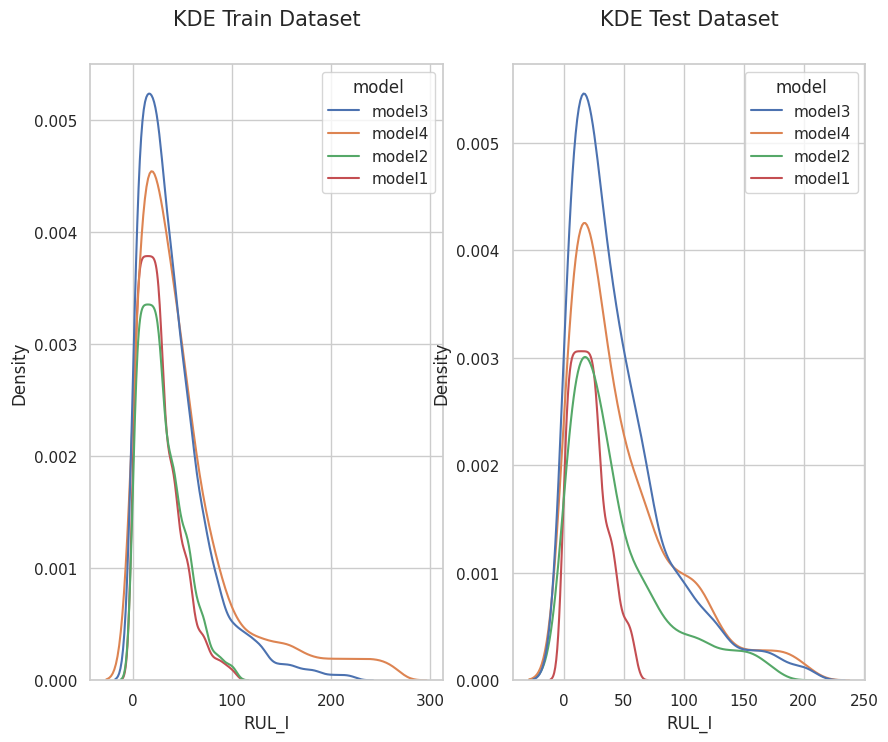

In [76]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

datasets = [train_df, test_df]
dataset_names = ["Train Dataset", "Test Dataset"]

for idx, name in enumerate(dataset_names):
  sns.kdeplot(data=datasets[idx], x="RUL_I", hue="model", ax = axs[idx])
  axs[idx].set_title(f"KDE {dataset_names[idx]}", y=1.05, size=15)

По графикам эмпирических плотностей вероятностей видно, что для тестового набора данных время полезной работы в среднем выше чем на обучающем наборе. Посмотрим также на это с помощью оценок функций распределений на тестовом и обучающем наборе данных

### **3.1.2 ECDF Target Values**

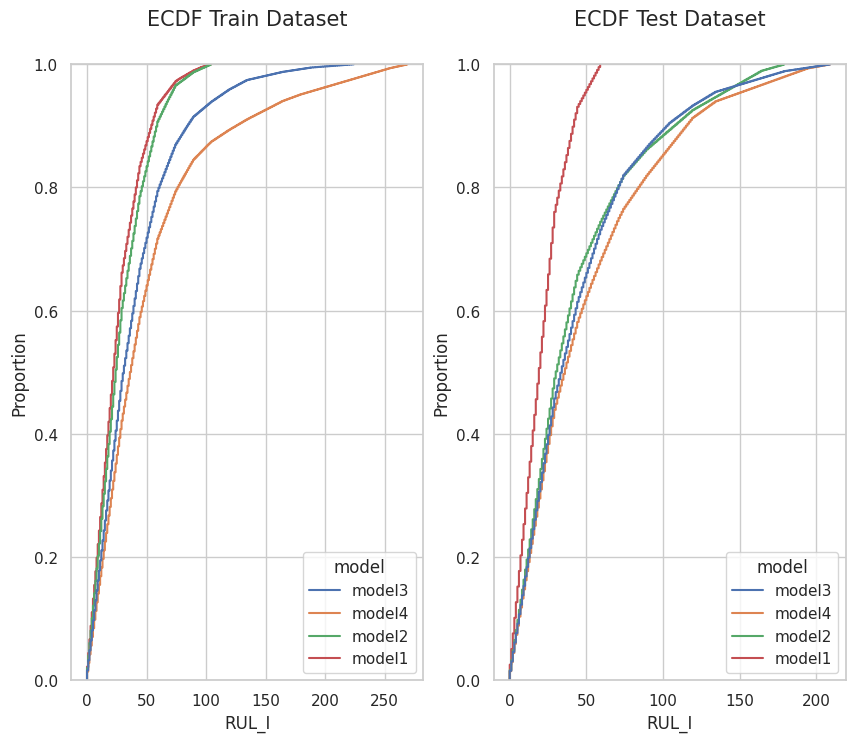

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

for idx, name in enumerate(dataset_names):
  sns.ecdfplot(data=datasets[idx], x="RUL_I", hue="model", ax = axs[idx])
  axs[idx].set_title(f"ECDF {dataset_names[idx]}", y=1.05, size=15)

Опять же на тестовом наборе данных продоложительность безотказной работы в среднем больше чем для обучающего набора данных

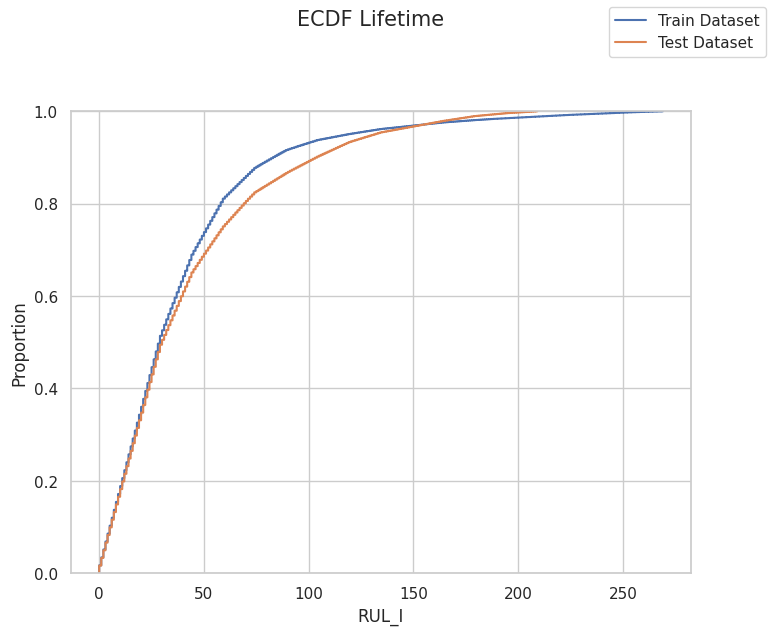

In [78]:
fig, axis = plt.subplots(figsize=(8, 6));
sns.ecdfplot(data=datasets[0], x="RUL_I", ax=axis, label="Train Dataset")
sns.ecdfplot(data=datasets[1], x="RUL_I", ax=axis, label="Test Dataset")
axis.figure.suptitle("ECDF Lifetime", y=1.05, size=15)
axis.figure.legend()

### **3.1.3 Distributions of Features**

Оценим присутствует ли смещение в признаковом пространстве приводящее к более продолжительной работе

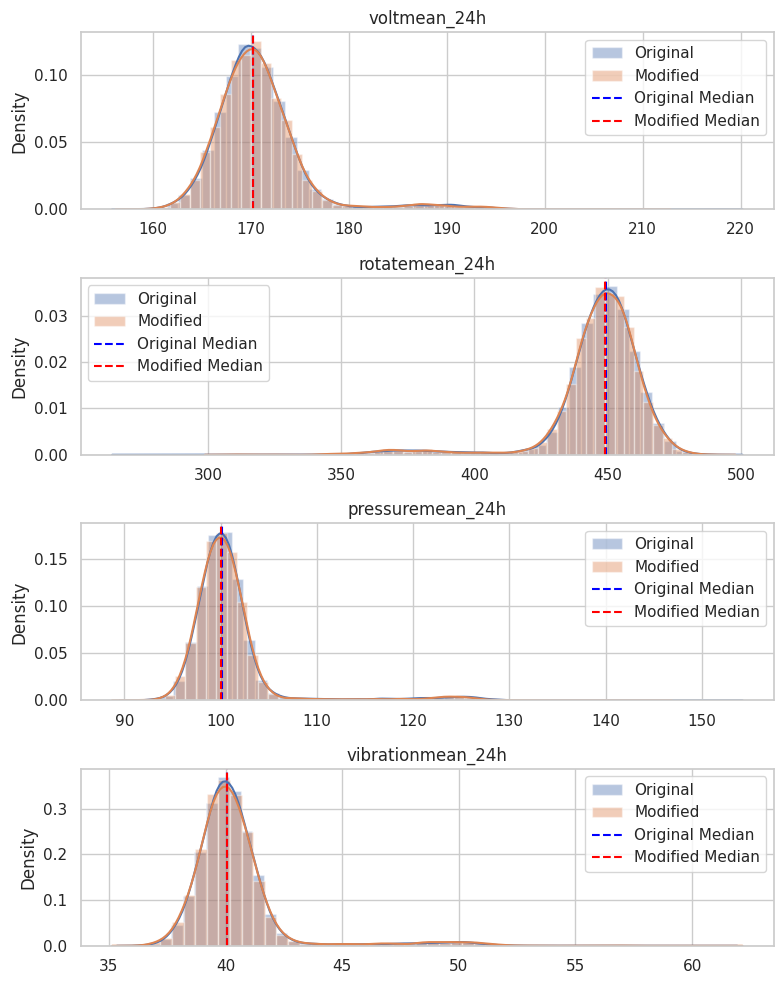

In [79]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8,10))

features = ["voltmean_24h","rotatemean_24h", "pressuremean_24h",
             "vibrationmean_24h"]

axs = axs.flatten()

X = train_df
X_mod = test_df

for i, feature in enumerate(features):
    sns.distplot(X[feature].values,  kde=True, label="Original", ax=axs[i])
    sns.distplot(X_mod[feature].values, kde=True, label="Modified", ax=axs[i])
    axs[i].axvline(np.median(X[feature].values), color="blue", linestyle="--", label="Original Median")
    axs[i].axvline(np.median(X_mod[feature].values), color="red", linestyle="--", label="Modified Median")
    axs[i].set_title(feature)
    axs[i].legend()

plt.tight_layout()

Распределения идентичны, но для тестового набора данных время безотказной работы выше чем для обучающего, поэтому чтобы избежать низкого качества метрик на тестовом наборе выполним перемешивание обучающего и тестового наборов и последующее их разбиение

## **3.2 Train and Test Dataset Correct Spliting**

In [80]:
random_state = 35
train_sz = .7

df = pd.concat([ftrain_df, ftest_df])
out_df = change_column_order(df)

train_df, test_df = train_test_split(out_df, test_size=1-train_sz, random_state=random_state)
train_df.to_csv("/drive/My Drive/rul/train_telemetry.csv", index=False)
test_df.to_csv("/drive/My Drive/rul/test_telemetry.csv", index=False)